# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Carissa Chung

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [34]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = load_concrete()

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [35]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# Step 3
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

# Define a list of models
models = [
    ("DT", DecisionTreeRegressor(max_depth=5, random_state=0)),
    ("RF", RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0)),
    ("GB", GradientBoostingRegressor(max_depth=5, random_state=0))
]

# Create lists to store results
model_names = []
training_accuracy = []
validation_accuracy = []

# Iterate through models
for model_name, model in models:
    model_names.extend([model_name] * 5)  # Extend model names for each fold

    scores = cross_validate(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    
    # Calculate training accuracy using cross_val_score
    train_scores = -scores['train_score']
    training_accuracy.extend(train_scores)
    
    # Calculate validation accuracy using cross_val_score
    val_scores = -scores['test_score']
    validation_accuracy.extend(val_scores)

# Step 5
# Create a DataFrame to store the results
data = {
    'Model': model_names,
    'Training Accuracy': training_accuracy,
    'Validation Accuracy': validation_accuracy
}

results = pd.DataFrame(data)

# Print the DataFrame
print(results)

# Group the results by 'Model' and calculate the mean
mean_results = results.groupby('Model').mean()

# Print the mean results
print("\n", mean_results)

   Model  Training Accuracy  Validation Accuracy
0     DT          44.431977            78.530777
1     DT          55.753645            58.129774
2     DT          44.577429            74.883797
3     DT          44.972729            81.353143
4     DT          46.663022            74.339164
5     RF          30.175139            44.702896
6     RF          30.497811            40.810587
7     RF          29.521419            47.628153
8     RF          28.310466            42.369915
9     RF          28.831935            50.393784
10    GB           3.655991            20.985837
11    GB           3.610096            18.614374
12    GB           3.603710            22.223800
13    GB           2.478394            24.891893
14    GB           3.549009            27.200200

        Training Accuracy  Validation Accuracy
Model                                        
DT             47.279761            73.447331
GB              3.379440            22.783221
RF             29.467354      

Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [36]:
# TO DO: ADD YOUR CODE HERE
# Define a list of models
models = [
    ("DT", DecisionTreeRegressor(max_depth=5, random_state=0)),
    ("RF", RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0)),
    ("GB", GradientBoostingRegressor(max_depth=5, random_state=0))
]

# Create lists to store results
model_names = []
training_accuracy_r2 = []
validation_accuracy_r2 = []

# Iterate through models
for model_name, model in models:
    model_names.extend([model_name] * 5)  # Extend model names for each fold

    scores_r2 = cross_validate(model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

    # Calculate training accuracy using cross_val_score
    train_scores_r2 = scores_r2['train_score']
    training_accuracy_r2.extend(train_scores_r2)
    
    # Calculate validation accuracy using cross_val_score
    val_scores_r2 = scores_r2['test_score']
    validation_accuracy_r2.extend(val_scores_r2)

data_r2 = {
    'Model': model_names,
    'Training Accuracy': training_accuracy_r2,
    'Validation Accuracy': validation_accuracy_r2
}

results_r2 = pd.DataFrame(data_r2)

# Print the DataFrame
print(results_r2)

# Group the results by 'Model' and calculate the mean
mean_results_r2 = results_r2.groupby('Model').mean()

# Print the mean results
print("\n", mean_results_r2)

   Model  Training Accuracy  Validation Accuracy
0     DT           0.848558             0.686485
1     DT           0.800906             0.810192
2     DT           0.843391             0.743552
3     DT           0.845048             0.698323
4     DT           0.834424             0.754932
5     RF           0.897151             0.821534
6     RF           0.891093             0.866743
7     RF           0.896285             0.836892
8     RF           0.902457             0.842882
9     RF           0.897694             0.833871
10    GB           0.987539             0.916219
11    GB           0.987108             0.939219
12    GB           0.987339             0.923892
13    GB           0.991461             0.907695
14    GB           0.987407             0.910331

        Training Accuracy  Validation Accuracy
Model                                        
DT              0.834465             0.738697
GB              0.988171             0.919471
RF              0.896936      

### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

1. Compared to the solutions from the previous assignment (linear model), all three of the non-linear models resulted in lower mean squared error (MSE) values. For the linear regression (LR) model, MSEs for the training and validation were 111.36 and 95.90 on average, respectively. For the decision tree (DT) model, average MSEs of 47.28 and 73.45 were achieved for training and validation, respectively. Lower average MSEs were calculated for the random forest (RF) model, 29.47 and 45.18, with the gradient boosting (GB) model having the lowest average MSEs of 3.38 for training and 22.78 for validation. The lower the MSE, the better the model's performance, and the closer its predictions are to the actual values. Inversely, the higher the MSE, the worst the model's performance. In more detail, a lower MSE indicates that on average, the model's predictions were closer to the actual values which means that the model has a smaller average error in its predictions. A lower training MSE is expected during the training phase since the model should learn to minimize errors on the training data. However, a substantially higher validation MSE compared to the training MSE suggests that the model may not generalize well and might be overfitting the training data. For all three of the non-linear models, this seems to be the case as the training MSE is not extremely low while having a much higher validation MSE. Thus, for the three non-linear models, I don't believe that there is overfitting of the training data. However for the linear model, a higher training MSE was observed compared to the validation MSE. This is not a typical scenario and could be caused by non-random splitting of data into the training and validation sets where the training dataset may have had more challenging data. In addition, there may be outliers in the data that a linear model may not be able to represent accurately. 

Regarding the R2 scores, a much better performance was observed for the three non-linear models compared to the linear model. For the linear model, an average training R2 score of 0.61 and an average validation R2 score of 0.62 were observed. In comparison, the DT model had training and validation average R2 scores of 0.83 and 0.74, respectively. Out of the three non-linear models, the DT model performed the worst. The RF model achieved average training and validation R2 scores of 0.90 and 0.84, respectively where as the GB model achieved 0.99 and 0.92, respectively. Since the R2 score is a statistical measure that is used to evaluate the goodness of fit of a regression model, a higher R2 score indicates that the model is able to better explain the variance in the target based on the features of the dataset. R2 scores range from 0 to 1, where a R2 score of 0 indicates that the model is a poor fit to the data. Thus based on the results, the higher training R2 score for the non-linear models suggests that the model fits the training data well and can explain a significant portion of the variance in the target in the training set. A signficantly lower validation R2 score relative to the training R2 score may indicate overfitting where the model may not be able to generalize well to the new and unseen validation data. However, for the three non-linear models, the validation R2 scores are not significantly lower than the training R2 score and thus, overfitting is most likely not occuring. However, similar to the MSE observations, the linear model resulted in a lower training R2 score compared to the validation R2 score. The same conclusions can be drawn for this scenario and further investigation should be conducted as this most likely indicates that something is amiss in the modeling process or that the linear model is not an appropriate model for the data. 

In general, the goal is to strike a balance between minimizing training MSE while ensuring that validation MSE remains reasonably low, indicating good generalization to new data. Similarly, one should aim for a relatively high R2 training score while also achieving a high validation R2 score. Minimizing the difference between these two R2 values may be a good indication of a good fitting model with the ability to generalize well to new data Techniques like regularization and cross-validation can help prevent overfitting and achieve a better balance between training and validation performance.

2. For the Decision Tree (DT) model, the results showed moderate training (0.83) and validation (0.74) accuracy. In addition, the model seems to have limited accuracy and might be overfitting because the training accuracy is quite a bit higher than the validation accuracy. For the Random Forest (RF) model, the results showed higher training (0.90) and validation (0.84) accuracy compared to DT. This is an indication of improved generalization. Although the training and validation accuracies are relatively high, the Gradient Boosting (GB) model showed much higher accuracies (0.99 and 0.92 for training and validation, respectively). In addition, GB can be robust against overfitting, especially with adequate hyperparameter tuning. This is because in GB, individual trees are not analyzed separately. Instead, all trees are averaged together so the trees that over fit will be averaged with under fitting trees. This results in an average that will be less likely to over fit or under fit the data. However, GB may be more computationally expensive and thus, require more time to train.

Overall, it appears that the Gradient Boosting model consistently provides the best performance in terms of both training and validation accuracy. If predictive accuracy is the primary goal, and the computational resources are not a limiting factor, Gradient Boosting is a good choice. However, if computational resources are limited, RF is a good compromise between predictive accuracy and computational efficiency. 

3. a) Hyperparameter Tuning - thorough hyperparameter tuning can be used to find the optimal settings for the model. Some of these hyperparameters include tree depth (max_depth), the minimum number of samples required to split an internal node (min_samples_split), and the number of trees in the forest (for Random Forest). For Gradient Boosting, you can optimize parameters like the learning rate, the number of estimators (trees), and the maximum depth of each tree. Similar to the above exercses, cross-validation could be used to evaluate the model's performance for each set of hyperparameters.

b) Feature Engineering - analyze and preprocess the dataset to improve the quality of input features. Feature engineering could include,
- Creating new features to capture valuable information
- Removing irrelevant features that may introduce noise
- Effective handling of missing data
- Scaling or normalizing features to ensure features are on a similar scale

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. The code was sourced from the Jupyter Notebooks for lecture and lab examples. In addition, the https://scikit-learn.org/ website was referenced for more details on the model parameters. The other source of the code was from ChatGPT. ChatGPT was referenced to make the looping portion of code I had written to populate the results table more efficient.
2. All steps were completed in the order they were presented in the assignment.
3. As mentioned previously, ChatGPT was used to make the for loop more efficient to populate the results table. The prompt incorporated the for loop I had written and a simple statement, "For the code below, refactor the for loop to be more efficient". The resulting code had to be modified to extract just the test_scores and train_scores from cross_validate.
4. The biggest challenge was determining the best way to incorporate a for loop to efficiently populate the results table. ChatGPT was helpful in explaining the reasoning behind the resulting code and why it was done this way. 

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# TO DO: Import wine dataset
def load_wine():
    '''Load and pre-process wine data
    
    if wine.data file is not present.
    
    it will be downloaded from
    https://archive.ics.uci.edu/dataset/109/wine.data
    
    return: data(DataFrame)
    
    '''
    
    import os
    import requests
    
    
    file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
    file_name = file_url.split('/')[-1]
    
    if not os.path.isfile(file_name):
        print('Downloading from {}'.format(file_url))
        r = requests.get(file_url)
        with open(file_name,'wb') as output_file:
            output_file.write(r.content)
        
    data = pd.read_csv(file_name, 
                   na_values='?', 
                   names=[ 'class', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium',
                            'total phenols', 'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity',
                            'hue', 'OD280/OD315 of diluted wines', 'proline'])
    
    return data

### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [39]:
# TO DO: ADD YOUR CODE HERE
data = load_wine()
data.head()

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [40]:
# TO DO: ADD YOUR CODE HERE
data.isnull().sum()

class                           0
alcohol                         0
malic acid                      0
ash                             0
alcalinity of ash               0
magnesium                       0
total phenols                   0
flavanoids                      0
nonflavanoid phenols            0
proanthocyanins                 0
color intensity                 0
hue                             0
OD280/OD315 of diluted wines    0
proline                         0
dtype: int64

In [41]:
# Create feature matrix and target vector and print shapes
X = data.drop(columns='class')
y = data['class']
print(f"Type of X:\n{X.dtypes}\nSize of X: {X.size:.0f}\nShape of X: {X.shape}")
print(f"X size={X.shape}; type={type(X)}")

print ("\n")

print(f"\nType of y:\n{y.dtypes}\nSize of y: {y.size:.0f}\nShape of y: {y.shape}")
print(f"y size={y.shape}; type={type(y)}")

Type of X:
alcohol                         float64
malic acid                      float64
ash                             float64
alcalinity of ash               float64
magnesium                         int64
total phenols                   float64
flavanoids                      float64
nonflavanoid phenols            float64
proanthocyanins                 float64
color intensity                 float64
hue                             float64
OD280/OD315 of diluted wines    float64
proline                           int64
dtype: object
Size of X: 2314
Shape of X: (178, 13)
X size=(178, 13); type=<class 'pandas.core.frame.DataFrame'>



Type of y:
int64
Size of y: 178
Shape of y: (178,)
y size=(178,); type=<class 'pandas.core.series.Series'>


How many samples do we have of each type of wine?

In [42]:
# TO DO: ADD YOUR CODE HERE
mask1 = data['class'] == 1
data1 = data.copy()[mask1]
print("Wine samples of class 1: ", data1['class'].count())

mask2 = data['class'] == 2
data2 = data.copy()[mask2]
print("Wine samples of class 2: ", data2['class'].count())

mask3 = data['class'] == 3
data3 = data.copy()[mask3]
print("Wine samples of class 3: ", data3['class'].count())

Wine samples of class 1:  59
Wine samples of class 2:  71
Wine samples of class 3:  48


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [62]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# Step 3
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

# Define a list of models
models = [
    ("SVC", SVC(random_state=0)),
    ("DT", DecisionTreeClassifier(max_depth=3, random_state=0))
]

# Create lists to store results
model_names = []
training_accuracy = []
validation_accuracy = []

# Iterate through models
for model_name, model in models:
    model_names.extend([model_name] * 5)  # Extend model names for each fold

    scores = cross_validate(model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
    
    # Calculate training accuracy using cross_val_score
    train_scores = scores['train_score']
    training_accuracy.extend(train_scores)
    
    # Calculate validation accuracy using cross_val_score
    val_scores = scores['test_score']
    validation_accuracy.extend(val_scores)

# Step 5
# Create a DataFrame to store the results
data = {
    'Model': model_names,
    'Training Accuracy': training_accuracy,
    'Validation Accuracy': validation_accuracy
}

results = pd.DataFrame(data)

# Print the DataFrame
print(results)

# Group the results by 'Model' and calculate the mean
mean_results = results.groupby('Model').mean()

# Print the mean results
print("\n", mean_results)

  Model  Training Accuracy  Validation Accuracy
0   SVC           0.679245             0.592593
1   SVC           0.660377             0.703704
2   SVC           0.688679             0.740741
3   SVC           0.682243             0.653846
4   SVC           0.691589             0.692308
5    DT           1.000000             0.888889
6    DT           0.990566             0.962963
7    DT           0.990566             0.925926
8    DT           0.990654             0.884615
9    DT           1.000000             0.807692

        Training Accuracy  Validation Accuracy
Model                                        
DT              0.994357             0.894017
SVC             0.680427             0.676638


In [61]:
# Specifying parameters for SVC

svc_model = SVC(gamma=0.001, C=10, random_state=0)
scores = cross_validate(svc_model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
train_acc = scores['train_score']
val_acc = scores['test_score']

print("Training accuracy: ", train_acc.mean())
print("Validation accuracy: ", val_acc.mean())


Training accuracy:  0.9812378769176512
Validation accuracy:  0.7148148148148149


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [44]:
# TO DO: Implement best model
model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Text(170.97222222222223, 0.5, 'true value')

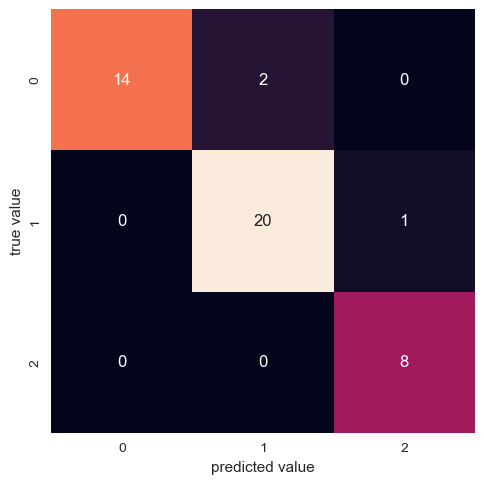

In [45]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_val, model.predict(X_val))

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [46]:
# TO DO: Print classification report
from sklearn.metrics import classification_report

report = classification_report(y_true=y, y_pred=model.predict(X), target_names=['0', '1', '2'], )
print(report);


              precision    recall  f1-score   support

           0       1.00      0.95      0.97        59
           1       0.96      0.99      0.97        71
           2       0.98      1.00      0.99        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

1. For the Support Vector Machines (SVC) model, the training accuracy varies from around 0.66 to 0.69 across each cross-validation run with an average of 0.68. The validation accuracy ranges from around 0.59 to 0.74 with an average of 0.68. On the other hand, for the Decision Trees (DT) model, the training accuracy for is consistently high, around 0.99 to 1.0. The validation accuracy ranged from 0.81 to 0.96. The DT model consistently outperformed the SVC model in both training and validation accuracy. Since the DT model achieved near-perfect training accuracy, this suggests that the model has learned the training data very well. However, it shows some variability in validation accuracy, indicating that it performs well on most validation sets but may overfit in some cases. For the SVC model, it achieved lower training and validation accuracies which may indicate that it might not capture the underlying patterns in the data as effectively as the DT model.
2. The first reason the SVC model did not work as well as the DT model could be due to model complexity. The SVC model may not be as flexible as the DT model since the DT can create complex decision boundaries, allowing it to fit the training data more closely. In contrast, the SVC's linear or kernel-based boundaries might not capture the data's patterns as effectively, leading to lower accuracy. The second reason could be due to hyperparameter tuning. Since the SVC model is very sensitive to the gamma (inverse of the width of the Gaussian kernel) and c (regularization parameter; limits the importance of each point) hyperparameters, it is more difficult to tune and thus, the SVC model may not have been appropriately tuned. Since no hyperparameters were specified when defining the SVC model in this exercise, it is very likely that this could be the reason why the SVC model did not perform as well as the DT model.
3. In step 5.2, 3 samples were incorrectly classified. Two samples were predicted to be class 1 but are actually class 0. The other sample was predicted to be class 2 but is actually class 1.
4. For this dataset, I believe precision is more important. This is because precision indicates the model's ability to correctly classify instances as positive (true positives) without misclassifying too many negatives as positives (minimizing false positives). High precision ensures that when the model predicts a particular cultivar (class), it's highly likely to be correct. Classifying a wine sample as coming from a cultivar when it doesn't can have consequences, depending on the application. For example, if a wine is falsely classified as belonging to a premium cultivar, it could lead to inaccurate labeling, quality issues, or economic losses. If the consequences of false positives are significant (e.g., economic costs, quality control issues), maximizing precision might be more important.

For recall, it aims to minimize false negatives. False negatives could be significant if failing to classify a wine sample correctly results in a high-quality wine being mistakenly classified as from another cultivar. In the context of this dataset, high recall would mean that the model correctly identifies all instances of a specific cultivar, minimizing false negatives. If the differences between cultivars have important practical implications (e.g., for wine quality or safety), maximizing recall might be more important. For example, if a specific cultivar is associated with unique characteristics or quality, missing any of its samples might be undesirable.

Depending on the specific goals, costs, and consequences of wine misclassification, the choice between recall and precision can be determined. Assuming that economic or quality control is crucial, precision may be more important. However, if it's crucial to avoid misclassifying wines of one particular cultivar, recall may be more important. This scenario may prove to be more important in particular cases (e.g., if there is a product recall and wines from a particular cultivar are being recalled). However, for the majority of cases, I believe that precision is more important in the case of this dataset.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. The code was sourced from the Jupyter Notebooks for lecture and lab examples (in particular, Decision Tree Example Jupyter notebook). In addition, the https://scikit-learn.org/ website was referenced for more details on the model parameters. The other source of the code was from ChatGPT. ChatGPT was referenced to make the looping portion of code I had written to populate the results table more efficient (as mentioned in part 1 of the assignment).
2. All steps were completed in the order they were presented in the assignment.
3. As mentioned previously, ChatGPT was used to make the for loop more efficient to populate the results table. The prompt incorporated the for loop I had written and a simple statement, "For the code below, refactor the for loop to be more efficient". The resulting code had to be modified to extract just the test_scores and train_scores from cross_validate.
4. The biggest challenge was determining the best way to incorporate a for loop to efficiently populate the results table. ChatGPT was helpful in explaining the reasoning behind the resulting code and why it was done this way. In addition, another challenge was determining whether precision or recall was more important as both cases could be argued for and against. To answer the question, I considered the use of the dataset and why wine anaylsis would be conducted in the first place. I concluded that wine analysis would most likely be conducted to determine the quality of the wine and thus, the economics surrounding the worth of the wine. 

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

For the regression portion (part 1), the results align with what was discussed during lectures. Since gradient boosting models are an ensemble method that combines multiple weak learners, the combination of the predictions of all these weak learners build on each other to form a more accurate model. Compared to the random forest model, the GB model have numerous hyperparameters that can be tuned to improve performace (e.g., learning rate, tree depth, etc.). In general, single decision trees tend to have high bias (underfitting) and low variance, while random forests reduce variance at the expense of potentially higher bias. However, gradient boosting strikes a good balance between bias and variance, resulting in a model that generalizes well to unseen data (validation score of 0.92 compared to DT, 0.74, and RF, 0.84).

For the classification portion (part 2), the DT model produced better results compared to SVC model (0.89 compared to 0.68). As mentioned above, this could be due to the SVC model being highly sensitive to the chosen gamma and c hyperparameters. Since the hyperparameters were not specified, it may be the reason that the SVC model did not perform as well as it could if the parameters were optimized. When gamma=0.001, C=10, was specified for the SVC model, a training score of 0.98 and validation score of 0.71 was observed. Thus, with more precise tuning, the SVC model may be able to produce better results than the DT model.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*
- I enjoyed seeing the results of the non-linear models compared to the linear model from the previous assignment. Knowing that the data was non-linear and seeing this confirmed by the results was interesting.
- The questions at the end of each part of the assignment helped me to try to delve deeper into understanding the results and why they were observed. The challenging parts of the assignment was interpreting precision and recall and trying to determine what was more important based on the context of the dataset.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [47]:
# TO DO: ADD YOUR CODE HERE

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

# Define a list of models
models = [
    ("LinearSVC", LinearSVC(max_iter=5000))
]

# Create lists to store results
model_names = []
training_accuracy = []
validation_accuracy = []

# Iterate through models
for model_name, model in models:
    model_names.extend([model_name] * 5)  # Extend model names for each fold

    scores = cross_validate(model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
    
    # Calculate training accuracy using cross_val_score
    train_scores = scores['train_score']
    training_accuracy.extend(train_scores)
    
    # Calculate validation accuracy using cross_val_score
    val_scores = scores['test_score']
    validation_accuracy.extend(val_scores)

# Step 5
# Create a DataFrame to store the results
data = {
    'Model': model_names,
    'Training Accuracy': training_accuracy,
    'Validation Accuracy': validation_accuracy
}

results = pd.DataFrame(data)

# Print the DataFrame
print(results)

# Group the results by 'Model' and calculate the mean
mean_results = results.groupby('Model').mean()

# Print the mean results
print("\n", mean_results)

c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` wi

       Model  Training Accuracy  Validation Accuracy
0  LinearSVC           0.962264             0.888889
1  LinearSVC           0.877358             0.925926
2  LinearSVC           0.952830             1.000000
3  LinearSVC           0.897196             0.884615
4  LinearSVC           0.971963             0.923077

            Training Accuracy  Validation Accuracy
Model                                            
LinearSVC           0.932322             0.924501


c:\Users\caris\Anaconda3\envs\ensf-611\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*ANSWER HERE*

Based on the above results, I don't believe that Linear SVC is a good fit for the data. This is because the model failed to converge after a large number of iterations (5000) which indicates that the model is unable to fit the data. Thus, the model will be unable to reliably predict the classes of wine. Although the training and validation accuracies appear higher compared to SVC, it is hard to make any conclusions as the model failed to converge.

I tried increasing the max_iter to 10000, 100000, and 1000000 but the model still could not converge. Thus, the model may not a good fit and may require too much computational resources to conduct enough iterations for the model to converge (if it will converge).